In [1]:
# Imports.
import pandas as pd
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.options.display.float_format = '{:,.4f}'.format


In [2]:
# Load CSV robustly.
candidates = [
    Path('linear_regression') / 'Life-Expectancy-Data-Updated.csv',
    Path('Life-Expectancy-Data-Updated.csv'),
    Path('..') / 'linear_regression' / 'Life-Expectancy-Data-Updated.csv'
]
DATA_PATH = next((p for p in candidates if p.exists()), candidates[0])
print('Data path chosen:', DATA_PATH)

try:
    df = pd.read_csv(DATA_PATH)
except FileNotFoundError:
    raise FileNotFoundError(f"CSV not found at any candidate path. Tried: {candidates}")

print('Shape:', df.shape)

df.head(8)


Data path chosen: Life-Expectancy-Data-Updated.csv
Shape: (2864, 21)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1000,13.0000,105.8240,1.3200,97,65,27.8000,97,97,0.0800,11006,78.5300,4.9000,4.8000,7.8000,0,1,76.5000
1,Spain,European Union,2015,2.7000,3.3000,57.9025,10.3500,97,94,26.0000,97,97,0.0900,25742,46.4400,0.6000,0.5000,9.7000,1,0,82.8000
2,India,Asia,2007,51.5000,67.9000,201.0765,1.5700,60,35,21.2000,67,64,0.1300,1076,"1,183.2100",27.1000,28.0000,5.0000,0,1,65.4000
3,Guyana,South America,2006,32.8000,40.5000,222.1965,5.6800,93,74,25.3000,92,93,0.7900,4146,0.7500,5.7000,5.5000,7.9000,0,1,67.0000
4,Israel,Middle East,2012,3.4000,4.3000,57.9510,2.8900,97,89,27.0000,94,94,0.0800,33995,7.9100,1.2000,1.1000,12.8000,1,0,81.7000
5,Costa Rica,Central America and Caribbean,2006,9.8000,11.2000,95.2200,4.1900,88,86,26.4000,89,89,0.1600,9110,4.3500,2.0000,1.9000,7.9000,0,1,78.2000
6,Russian Federation,Rest of Europe,2015,6.6000,8.2000,223.0000,8.0600,97,97,26.2000,97,97,0.0800,9313,144.1000,2.3000,2.3000,12.0000,0,1,71.2000
7,Hungary,European Union,2000,8.7000,10.1000,192.9690,12.2300,88,99,25.9000,99,99,0.0800,8971,10.2100,2.3000,2.3000,10.2000,1,0,71.2000


In [3]:
# Inspect missing values.
print('\n== df.info() ==')
df.info()

missing = df.isnull().sum().sort_values(ascending=False)
print('\nColumns with missing values:')
print(missing[missing>0])

missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
print('\nMissing percentages (top):')
print(missing_percent[missing_percent>0].head(20))

# Show rows with the most missing columns (top 10)
row_missing = df.isnull().sum(axis=1).sort_values(ascending=False)
print('\nRows with most missing values (counts):')
print(row_missing.head(10))



== df.info() ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  G

In [4]:
# Data types and conversions.
print('\n== dtypes ==')
print(df.dtypes)

# Find object columns that may be numeric
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
print('\nObject columns:', obj_cols)

# Attempt to coerce object columns to numeric where appropriate and report success
coercion_report = {}
for c in obj_cols:
    coerced = pd.to_numeric(df[c], errors='coerce')
    coerced_nonnull = coerced.notnull().sum()
    coercion_report[c] = int(coerced_nonnull)

print('\nCoercion report (non-null counts after numeric coercion):')
print(coercion_report)

# If date-like columns exist, parse them later with pd.to_datetime if needed.



== dtypes ==
Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

Object columns: ['Country', 'Region']

Coercion report (non-null counts after numeric coercion):
{'Country': 0, 'Region': 0}


In [5]:
# Summary statistics.
print('\n== Describe (all) ==')
des_all = df.describe(include='all').transpose()
des_all.head(20)

print('\n== Numeric describe ==')
num_des = df.describe().transpose()
num_des[['count','mean','std','min','25%','50%','75%','max']].head(20)

# Additional statistics: median and IQR for numeric columns
num_stats = pd.DataFrame()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_stats['median'] = df[num_cols].median()
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
num_stats['IQR'] = Q3 - Q1
num_stats['q1'] = Q1
num_stats['q3'] = Q3
num_stats.head(20)

# Detect potential outliers using IQR rule for numeric columns
outlier_counts = ((df[num_cols] < (Q1 - 1.5*(Q3-Q1))) | (df[num_cols] > (Q3 + 1.5*(Q3-Q1)))).sum().sort_values(ascending=False)
print('\nPotential outlier counts (top):')
print(outlier_counts.head(20))



== Describe (all) ==

== Numeric describe ==

Potential outlier counts (top):
Economy_status_Developed       592
Economy_status_Developing      592
Incidents_HIV                  461
GDP_per_capita                 425
Population_mln                 362
Polio                          190
Diphtheria                     187
Hepatitis_B                    164
Adult_mortality                112
Under_five_deaths              102
Thinness_five_nine_years        95
Thinness_ten_nineteen_years     89
Measles                         35
Infant_deaths                   29
BMI                             25
Life_expectancy                 19
Alcohol_consumption              2
Schooling                        0
Year                             0
dtype: int64


Detected target: Life_expectancy
Target dtype: float64
Missing count in target: 0 (0.00%)


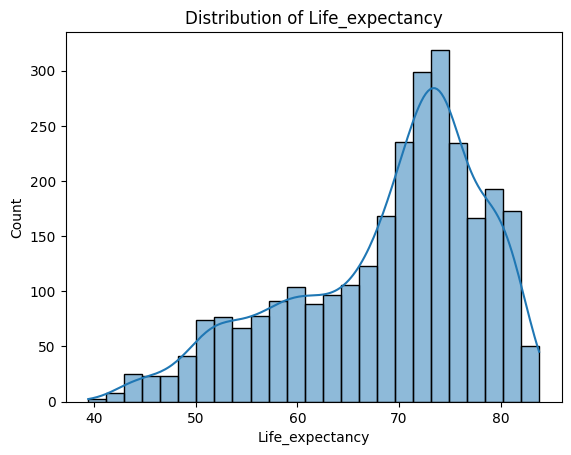

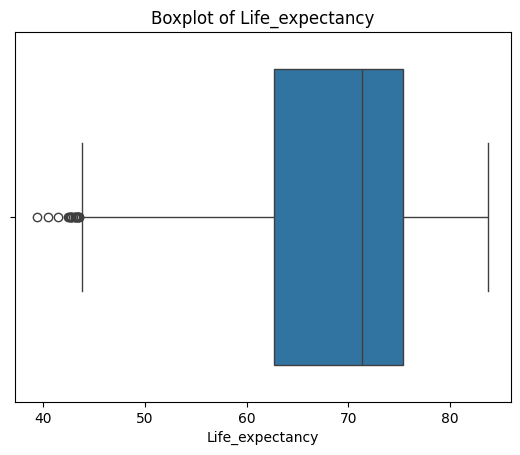

In [6]:
# Identify target variable.

def detect_target(cols):
    cols_lower = [c.lower() for c in cols]
    if 'life_expectancy' in cols_lower:
        return cols[cols_lower.index('life_expectancy')]
    for c in cols:
        low = c.lower()
        if 'life' in low and 'expect' in low:
            return c
    for c in cols:
        low = c.lower()
        if 'life' in low or 'expect' in low:
            return c
    year_cols = []
    for c in cols:
        try:
            year_cols.append((int(c), c))
        except Exception:
            continue
    if year_cols:
        return max(year_cols)[1]
    return None

TARGET = detect_target(df.columns)
print('Detected target:', TARGET)
if TARGET is not None:
    print('Target dtype:', df[TARGET].dtype)
    miss = df[TARGET].isnull().sum()
    print('Missing count in target:', miss, f'({miss/len(df):.2%})')
    try:
        sns.histplot(df[TARGET].dropna(), kde=True)
        plt.title(f'Distribution of {TARGET}')
        plt.show()
        sns.boxplot(x=df[TARGET].dropna())
        plt.title(f'Boxplot of {TARGET}')
        plt.show()
    except Exception:
        pass
else:
    print('No clear target detected.')


In [7]:
# Identify candidate predictors.
if TARGET is None:
    raise RuntimeError('No target detected; cannot compute predictors')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

# Exclude target from candidates
if TARGET in numeric_cols:
    numeric_cols.remove(TARGET)
if TARGET in cat_cols:
    cat_cols.remove(TARGET)

print('\nNumeric candidate count:', len(numeric_cols))
print('Categorical candidate count:', len(cat_cols))

# Correlations with target (absolute)
corrs = df[numeric_cols + [TARGET]].corr()[TARGET].abs().sort_values(ascending=False)
# remove the target itself if present
if TARGET in corrs.index:
    corrs = corrs.drop(TARGET)

numeric_top = corrs.head(15)
print('\nTop numeric predictors by absolute correlation with target:')
print(numeric_top)

# For categorical variables: show unique counts and group means for the target
cat_info = {}
small_cardinality = []
for c in cat_cols:
    nunique = df[c].nunique(dropna=False)
    cat_info[c] = int(nunique)
    if nunique <= 12:
        small_cardinality.append(c)

print('\nCategorical columns unique-counts (sample):')
print({k:cat_info[k] for k in list(cat_info)[:20]})
print('\nSmall-cardinality categorical columns (<=12 unique):')
print(small_cardinality)

# propose candidate predictors: top numeric + small-cardinality categorical
candidate_predictors = list(numeric_top.head(10).index) + small_cardinality
print('\nProposed candidate predictors (first 20):')
print(candidate_predictors[:20])



Numeric candidate count: 18
Categorical candidate count: 2

Top numeric predictors by absolute correlation with target:
Adult_mortality               0.9454
Under_five_deaths             0.9204
Infant_deaths                 0.9200
Schooling                     0.7325
Polio                         0.6412
Diphtheria                    0.6275
BMI                           0.5984
GDP_per_capita                0.5831
Incidents_HIV                 0.5530
Economy_status_Developed      0.5238
Economy_status_Developing     0.5238
Measles                       0.4900
Thinness_ten_nineteen_years   0.4678
Thinness_five_nine_years      0.4582
Hepatitis_B                   0.4178
Name: Life_expectancy, dtype: float64

Categorical columns unique-counts (sample):
{'Country': 179, 'Region': 9}

Small-cardinality categorical columns (<=12 unique):
['Region']

Proposed candidate predictors (first 20):
['Adult_mortality', 'Under_five_deaths', 'Infant_deaths', 'Schooling', 'Polio', 'Diphtheria', 'BMI', 'G

In [8]:
# Check missingness for candidate predictors.
cand_missing = pd.Series({c: df[c].isnull().mean()*100 for c in candidate_predictors}).sort_values(ascending=False)
print('\nMissing % for candidate predictors:')
print(cand_missing)

# Save a small summary to JSON for downstream scripts
summary = {
    'target': TARGET,
    'candidate_predictors': candidate_predictors,
    'numeric_top': list(numeric_top.head(15).index),
    'categorical_suggested': small_cardinality
}

out_path = Path('notebooks') / 'explore_summary.json'
out_path.parent.mkdir(exist_ok=True)
out_path.write_text(json.dumps(summary, indent=2))
print(f"\nSaved summary to {out_path}")



Missing % for candidate predictors:
Adult_mortality            0.0000
Under_five_deaths          0.0000
Infant_deaths              0.0000
Schooling                  0.0000
Polio                      0.0000
Diphtheria                 0.0000
BMI                        0.0000
GDP_per_capita             0.0000
Incidents_HIV              0.0000
Economy_status_Developed   0.0000
Region                     0.0000
dtype: float64

Saved summary to notebooks/explore_summary.json


In [9]:
# Load preprocessed data if present.
from pathlib import Path
prepro = Path('preprocessed_life_expectancy.csv')
if prepro.exists():
    df_pre = pd.read_csv(prepro)
    print('Preprocessed shape:', df_pre.shape)
    display(df_pre.head())
else:
    print('Preprocessed file not found at', prepro, "\nRun preprocess_and_save.py to create it.")


Preprocessed shape: (2864, 28)


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,1.6270,-0.6997,-0.6718,-0.7523,-0.8793,0.7946,-0.6617,1.2615,0.6964,0.6907,-0.3420,-0.0316,0.3067,0.0077,-0.0221,0.0529,-0.5105,0.5105,76.5000,False,False,False,False,True,False,False,False,False
1,1.6270,-1.0047,-0.8895,-1.1694,1.3888,0.7946,0.8927,0.4409,0.6964,0.6907,-0.3378,0.8387,0.0716,-0.9613,-0.9725,0.6521,1.9590,-1.9590,82.8000,False,False,False,True,False,False,False,False,False
2,-0.1085,0.7677,0.5602,0.0768,-0.8165,-1.5190,-2.2697,-1.7474,-1.2933,-1.4340,-0.3210,-0.6181,8.4019,5.0106,5.1057,-0.8301,-0.5105,0.5105,65.4000,False,True,False,False,False,False,False,False,False
3,-0.3254,0.0885,-0.0547,0.2606,0.2158,0.5445,-0.1793,0.1218,0.3648,0.4332,-0.0438,-0.4367,-0.2633,0.1880,0.1327,0.0845,-0.5105,0.5105,67.0000,False,False,False,False,False,False,False,False,True
4,0.9762,-0.9793,-0.8671,-1.1689,-0.4850,0.7946,0.6247,0.8968,0.4974,0.4976,-0.3420,1.3261,-0.2108,-0.8261,-0.8398,1.6297,1.9590,-1.9590,81.7000,False,False,False,False,True,False,False,False,False


Runs the full preprocess-to-training pipeline and saves the best model and scaler.

Loading raw CSV: Life-Expectancy-Data-Updated.csv
raw shape: (2864, 21)
Dropped irrelevant columns: ['Country']
Detected target: Life_expectancy
Dropped rows with missing target: 0
Saved preprocessed data to preprocessed_life_expectancy.csv


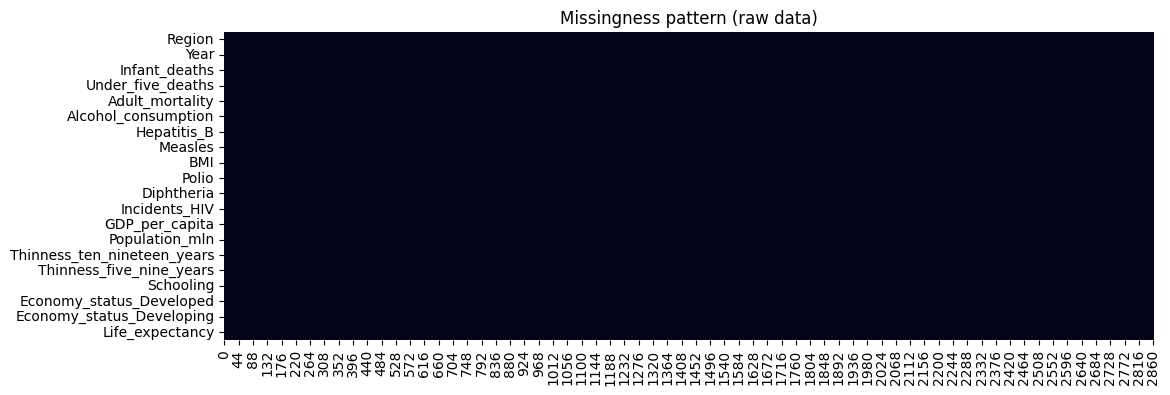

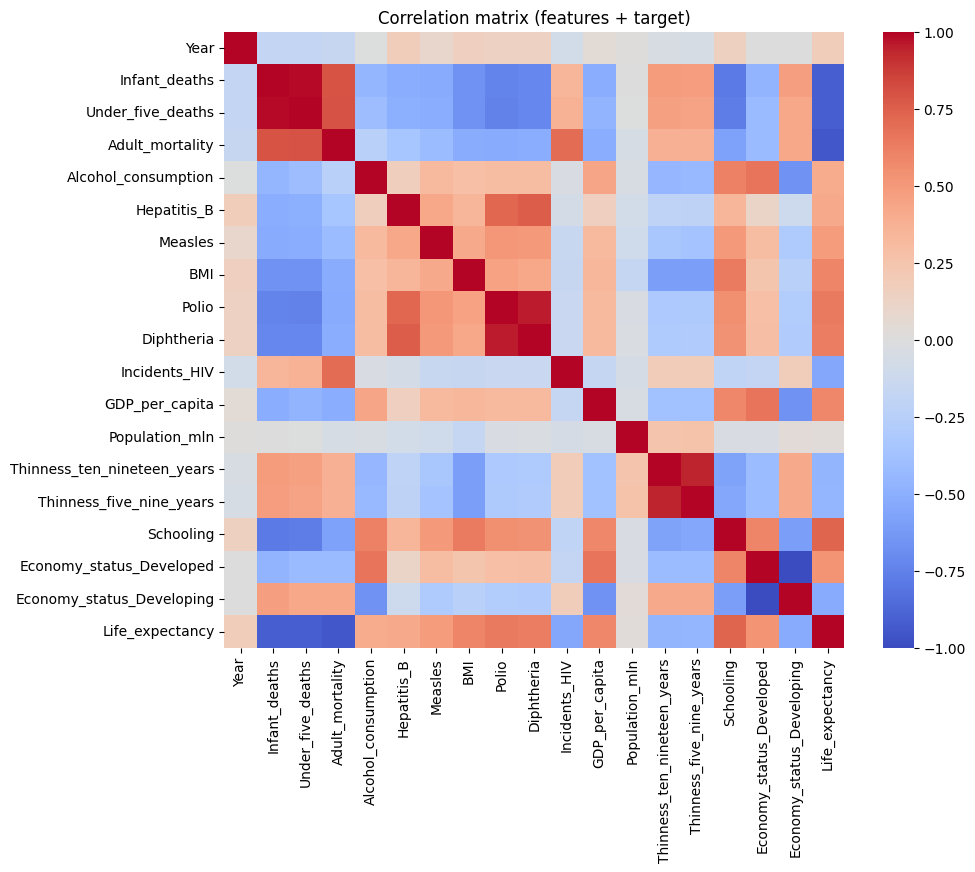

In [10]:
# Preprocess data and save scaler.
%matplotlib inline
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler

ROOT = Path('.')
candidates = [
    ROOT / 'Life-Expectancy-Data-Updated.csv',
    ROOT / 'linear_regression' / 'Life-Expectancy-Data-Updated.csv',
    ROOT / '..' / 'linear_regression' / 'Life-Expectancy-Data-Updated.csv'
]
RAW = next((p for p in candidates if p.exists()), candidates[0])
PREPRO_OUT = ROOT / 'preprocessed_life_expectancy.csv'
SCALER_OUT = ROOT / 'preprocessing_scaler.joblib'

print('Loading raw CSV:', RAW)
df_raw = pd.read_csv(RAW)
print('raw shape:', df_raw.shape)

# Drop irrelevant columns if present
irrelevant = ['Country', 'Country Code', 'Indicator', 'Indicator Code', 'Series Name', 'Series Code', 'Unnamed: 0', 'id']
to_drop = [c for c in irrelevant if c in df_raw.columns]
if to_drop:
    df_raw = df_raw.drop(columns=to_drop)
    print('Dropped irrelevant columns:', to_drop)

# One-hot encode small-cardinality object cols
obj_cols = df_raw.select_dtypes(include=['object']).columns.tolist()
onehot_cols = [c for c in obj_cols if df_raw[c].nunique(dropna=False) <= 30]
if onehot_cols:
    df = pd.get_dummies(df_raw, columns=onehot_cols, dummy_na=False)
else:
    df = df_raw.copy()

# Convert any remaining object columns to numeric (coerce)
for c in df.select_dtypes(include=['object']).columns.tolist():
    df[c] = pd.to_numeric(df[c], errors='coerce')

# detect target
def detect_target(cols):
    cols_lower = [c.lower() for c in cols]
    if 'life_expectancy' in cols_lower:
        return cols[cols_lower.index('life_expectancy')]
    for c in cols:
        low = c.lower()
        if 'life' in low and 'expect' in low:
            return c
    for c in cols:
        low = c.lower()
        if 'life' in low or 'expect' in low:
            return c
    return None

TARGET = detect_target(df.columns)
print('Detected target:', TARGET)
if TARGET is None:
    raise RuntimeError('Target not found')

# Drop rows missing target
before = len(df)
df = df.dropna(subset=[TARGET])
print('Dropped rows with missing target:', before - len(df))

# Features are numeric columns except target
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in num_cols if c != TARGET]

# Impute median on features
medians = df[feature_cols].median()
df[feature_cols] = df[feature_cols].fillna(medians)

# Standardize features (fit scaler)
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save preprocessed CSV and scaler for reproducibility
PREPRO_OUT.write_text('')
df.to_csv(PREPRO_OUT, index=False)
joblib.dump(scaler, SCALER_OUT)
print('Saved preprocessed data to', PREPRO_OUT)

# Quick visualizations: heatmap of missingness in raw data (before imputation)
plt.figure(figsize=(12,4))
mask = df_raw.isnull()
sns.heatmap(mask.T, cbar=False)
plt.title('Missingness pattern (raw data)')
plt.show()

# Pairwise correlation heatmap on top numeric features
corr = df[feature_cols + [TARGET]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation matrix (features + target)')
plt.show()


In [11]:
# Feature selection.
import numpy as np

# compute absolute correlations with target
corrs = df[feature_cols + [TARGET]].corr()[TARGET].abs().sort_values(ascending=False)
if TARGET in corrs.index:
    corrs = corrs.drop(TARGET)

TOP_N = 15
candidates = corrs.dropna().head(TOP_N).index.tolist()

# Remove very sparse or low-variance features (after scaling)
nonzero_frac = (df[candidates] != 0).sum() / len(df)
sparse_threshold = 0.01
sparse = nonzero_frac[nonzero_frac < sparse_threshold].index.tolist()
low_var = df[candidates].var()[df[candidates].var() <= 1e-6].index.tolist()

selected = [c for c in candidates if c not in sparse and c not in low_var]
# if filtered too much, relax and take top correlations
idx = TOP_N
while len(selected) < TOP_N and idx < len(corrs):
    cand = corrs.dropna().index[idx]
    if cand not in sparse and cand not in low_var:
        selected.append(cand)
    idx += 1

if not selected:
    selected = corrs.dropna().head(10).index.tolist()

print('Selected features (count=%d):' % len(selected))
print(selected)

# store final feature list to file
(Path('.') / 'final_feature_list.txt').write_text('\n'.join(selected))


Selected features (count=15):
['Adult_mortality', 'Under_five_deaths', 'Infant_deaths', 'Schooling', 'Polio', 'Diphtheria', 'BMI', 'GDP_per_capita', 'Incidents_HIV', 'Economy_status_Developed', 'Economy_status_Developing', 'Measles', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Hepatitis_B']


231

In [12]:
# Train and evaluate models.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

features = selected
X = df[features]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a scaler on the selected features to avoid feature-name mismatches
from sklearn.preprocessing import StandardScaler as _SS
scaler_used = _SS().fit(X_train)
X_train_s = scaler_used.transform(X_train)
X_test_s = scaler_used.transform(X_test)

# Prepare models
lr = LinearRegression()
best_dt = None
best_dt_rmse = 1e9
dt_results = {}
for depth in [3,5,7,9,None]:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train_s, y_train)
    dt_preds = dt.predict(X_test_s)
    dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
    dt_results[str(depth)] = {'rmse': dt_rmse, 'r2': r2_score(y_test, dt_preds), 'mae': mean_absolute_error(y_test, dt_preds)}
    if dt_rmse < best_dt_rmse:
        best_dt_rmse = dt_rmse
        best_dt = dt

rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train LR
lr.fit(X_train_s, y_train)
lr_preds = lr.predict(X_test_s)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

# Train RF
rf.fit(X_train_s, y_train)
rf_preds = rf.predict(X_test_s)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

# Evaluate and display
results = {
    'LinearRegression': {'rmse': lr_rmse, 'r2': r2_score(y_test, lr_preds), 'mae': mean_absolute_error(y_test, lr_preds)},
    'DecisionTree': dt_results,
    'RandomForest': {'rmse': rf_rmse, 'r2': r2_score(y_test, rf_preds), 'mae': mean_absolute_error(y_test, rf_preds)}
}

print('Results:\n', results)

# Feature importances from RF
importances = dict(zip(features, rf.feature_importances_))
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)
print('\nRandomForest feature importances (top 10):')
for f,imp in importances_sorted[:10]:
    print(f, imp)

# Save models and info
models_dir = Path('models')
models_dir.mkdir(exist_ok=True)
joblib.dump(lr, models_dir / 'linear_regression.joblib')
joblib.dump(best_dt, models_dir / 'decision_tree_best.joblib')
joblib.dump(rf, models_dir / 'random_forest.joblib')
joblib.dump(scaler_used, models_dir / 'selected_scaler.joblib')

info = {
    'target': TARGET,
    'features': features,
    'results_summary': results,
    'best_model_by_rmse': 'RandomForest' if rf_rmse < lr_rmse and rf_rmse < best_dt_rmse else ('LinearRegression' if lr_rmse < best_dt_rmse else 'DecisionTree')
}
Path('model_selection_info.json').write_text(json.dumps(info, indent=2))
print('\nSaved models and model_selection_info.json')


/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Results:
 {'LinearRegression': {'rmse': np.float64(1.371305168334713), 'r2': 0.97734123885331, 'mae': 1.0883187785939814}, 'DecisionTree': {'3': {'rmse': np.float64(2.3872111457562397), 'r2': 0.9313327582694512, 'mae': 1.8654779922932632}, '5': {'rmse': np.float64(1.515742706019338), 'r2': 0.9723166330283517, 'mae': 1.2073714769728436}, '7': {'rmse': np.float64(1.1520424401574345), 'r2': 0.9840079222521633, 'mae': 0.9117575243489284}, '9': {'rmse': np.float64(0.8646602075183862), 'r2': 0.9909913672771838, 'mae': 0.6512121156400773}, 'None': {'rmse': np.float64(0.7795040263209752), 'r2': 0.9926784225428689, 'mae': 0.5380453752181503}}, 'RandomForest': {'rmse': np.float64(0.5119137054207062), 'r2': 0.9968423684712843, 'mae': 0.38436910994764684}}

RandomForest feature importances (top 10):
Under_five_deaths 0.743920590475888
Adult_mortality 0.22855724923326412
Infant_deaths 0.012397812538445425
GDP_per_capita 0.002776442857387653
Incidents_HIV 0.0022021766200093808
BMI 0.0020109681165600

/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarni

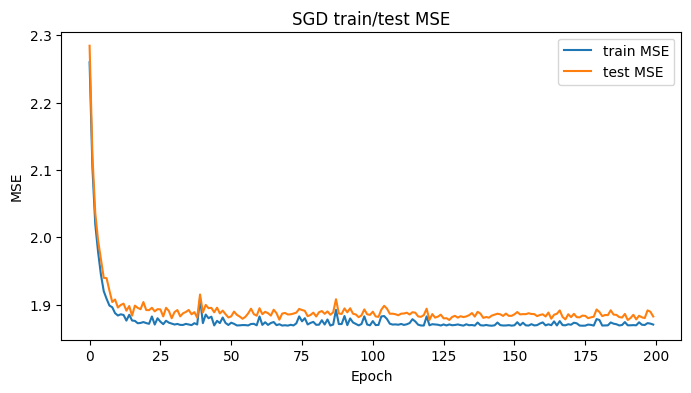

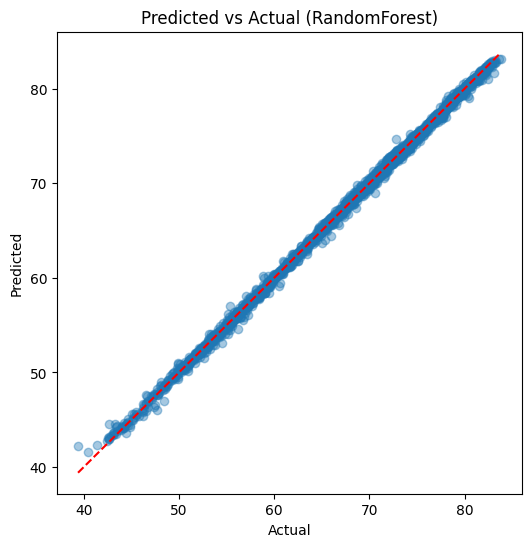

In [13]:
# SGD linear regression training and plots.
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='invscaling', eta0=0.01, random_state=42)
# convert to arrays
Xtr = X_train_s
Xte = X_test_s
n_epochs = 200
train_mse = []
test_mse = []
# initial partial_fit to initialize
sgd.partial_fit(Xtr, y_train)
for epoch in range(n_epochs):
    idx = np.random.permutation(len(Xtr))
    sgd.partial_fit(Xtr[idx], y_train.values[idx])
    pred_tr = sgd.predict(Xtr)
    pred_te = sgd.predict(Xte)
    train_mse.append(mean_squared_error(y_train, pred_tr))
    test_mse.append(mean_squared_error(y_test, pred_te))

# Plot loss curves inline
plt.figure(figsize=(8,4))
plt.plot(train_mse, label='train MSE')
plt.plot(test_mse, label='test MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('SGD train/test MSE')
plt.legend()
plt.show()

# Save SGD model
joblib.dump(sgd, models_dir / 'sgd_regressor.joblib')

# Scatter plot: actual vs predicted for best model
best_model_name = info['best_model_by_rmse']
if best_model_name == 'RandomForest':
    best_model = joblib.load(models_dir / 'random_forest.joblib')
elif best_model_name == 'LinearRegression':
    best_model = joblib.load(models_dir / 'linear_regression.joblib')
else:
    best_model = joblib.load(models_dir / 'decision_tree_best.joblib')

preds_best = best_model.predict(np.vstack([Xtr, Xte])) if hasattr(best_model, 'predict') else None
actual_full = np.concatenate([y_train.values, y_test.values])

plt.figure(figsize=(6,6))
plt.scatter(actual_full, np.concatenate([best_model.predict(Xtr), best_model.predict(Xte)]), alpha=0.4)
mn = min(actual_full.min(), np.min(best_model.predict(np.vstack([Xtr,Xte]))))
mx = max(actual_full.max(), np.max(best_model.predict(np.vstack([Xtr,Xte]))))
plt.plot([mn,mx], [mn,mx], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Predicted vs Actual ({best_model_name})')
plt.show()


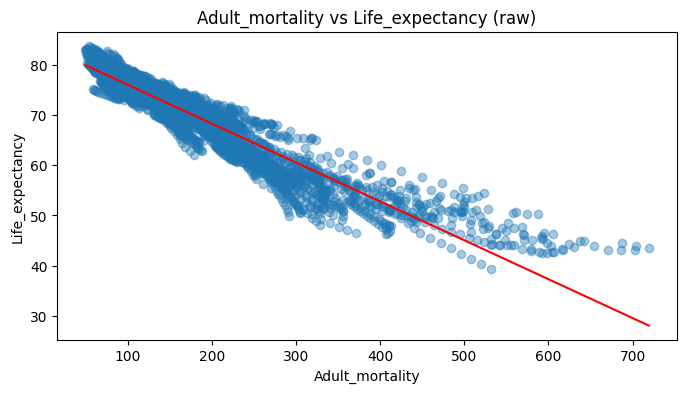

/Users/vinny/Desktop/ALU/Math for ML/Summative/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


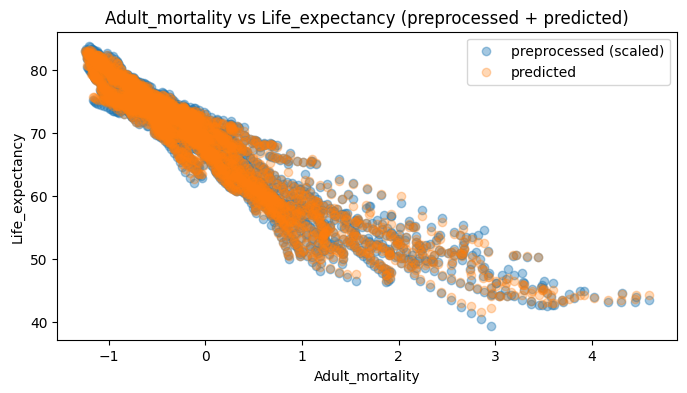

In [14]:
# Scatter plots and overlays.
top = features[0]
# Raw scatter
if top in df_raw.columns:
    plt.figure(figsize=(8,4))
    plt.scatter(df_raw[top], df_raw[TARGET], alpha=0.4)
    plt.xlabel(top)
    plt.ylabel(TARGET)
    plt.title(f'{top} vs {TARGET} (raw)')
    # univariate linear fit
    from sklearn.linear_model import LinearRegression as _LR
    lr_uni = _LR()
    xr = df_raw[[top]].values
    mask = ~np.isnan(xr).ravel() & ~np.isnan(df_raw[TARGET].values)
    try:
        lr_uni.fit(xr[mask], df_raw[TARGET].values[mask])
        line_x = np.linspace(np.nanmin(xr), np.nanmax(xr), 100)
        plt.plot(line_x, lr_uni.predict(line_x.reshape(-1,1)), 'r-')
    except Exception:
        pass
    plt.show()

# Preprocessed scatter with predictions
if top in df.columns:
    plt.figure(figsize=(8,4))
    plt.scatter(df[top], df[TARGET], alpha=0.4, label='preprocessed (scaled)')
    preds_all = best_model.predict(df[features])
    plt.scatter(df[top], preds_all, alpha=0.3, label='predicted')
    plt.xlabel(top)
    plt.ylabel(TARGET)
    plt.title(f'{top} vs {TARGET} (preprocessed + predicted)')
    plt.legend()
    plt.show()
